# Ford GoBike Rides Data Exploration
## by Deepanshu Sharma

## Preliminary Wrangling

>The Ford GoBike System Data contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [3]:
df.shape

(519700, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


Calculate appoximate age of members from birth year

In [6]:
df['approx_age'] = 2019-df['member_birth_year']

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,approx_age
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,32.0
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,54.0
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,22.0


Convert start_time and end_time to datetime dtypes

In [13]:
df['start_time'] = pd.to_datetime(df['start_time'], infer_datetime_format=True)

In [14]:
df['end_time'] = pd.to_datetime(df['end_time'], infer_datetime_format=True)

Extract month, day of the week and hour from start time

In [16]:
df['start_month'] = df['start_time'].dt.month

In [22]:
df['start_day'] = df['start_time'].dt.dayofweek

In [20]:
df['start_hour'] = df['start_time'].dt.hour

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 19 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
approx_age                 453159 non-null float64
start_month                519700 non-null int64
start_day             

### What is the structure of your dataset?

> The dataset has 519,700 rows and 19 columns

### What is/are the main feature(s) of interest in your dataset?

> I want to explore the trip duration variable (duration_sec)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think user_type, member_gender, approx_age, start_month, start_day, start_hour will help support my investigation into the trip duration

## Univariate Exploration

duration_sec is a quantitative variable, hence a histogram would be appropriate to explore this variable

(array([5.12824e+05, 3.79800e+03, 1.29200e+03, 5.47000e+02, 2.57000e+02,
        2.16000e+02, 2.45000e+02, 1.90000e+02, 1.63000e+02, 1.68000e+02]),
 array([6.10000e+01, 8.69180e+03, 1.73226e+04, 2.59534e+04, 3.45842e+04,
        4.32150e+04, 5.18458e+04, 6.04766e+04, 6.91074e+04, 7.77382e+04,
        8.63690e+04]),
 <a list of 10 Patch objects>)

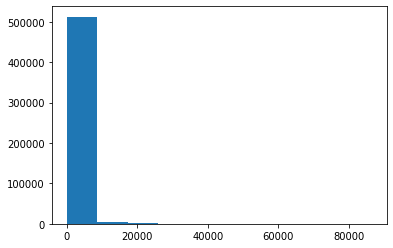

In [26]:
plt.hist(data=df, x='duration_sec')

We see that the distribution is highly skewed on the right. Therefore, let's try log transforamtion on the x-axis

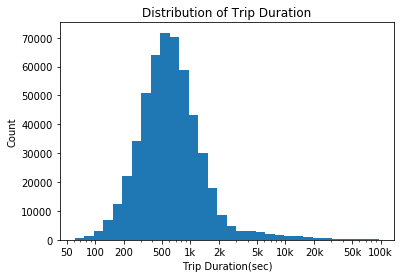

In [37]:
bins = 10**(np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+0.1, 0.1))
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xscale('log')
x_ticks=[50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
tick_labels = ['50', '100', '200', '500', '1k', '2k', '5k', '10k', '20k', '50k', '100k']
plt.xticks(x_ticks, tick_labels)
plt.xlabel('Trip Duration(sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration');

Thus, we observe that we have a unimodal distribution with mode at about 500 sec

Now, let's look at how user_type is distributed. As it is a nominal, categorical variable, a bar chart is fit to look at its distribution.

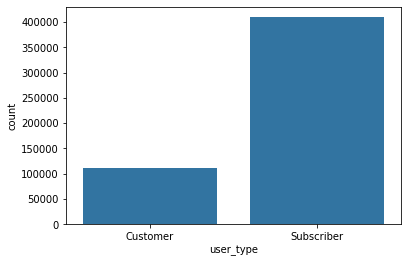

In [39]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base_color)

We see that the majority of users are subscribers

Let's have a look at genders now. Again, it's a nominal, categorical variable hence let's draw a bar chart

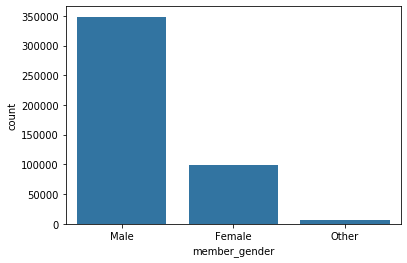

In [40]:
sb.countplot(data=df, x='member_gender', color=base_color)

The number of males is more than double the number of females using the service. Members of "Other" gender are very few relatively 

Let's see how age is distributed. As it is a quantitative variable, we'll use a histogram 

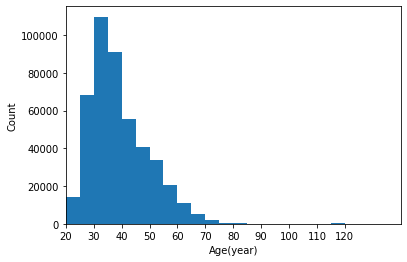

In [51]:
bins = np.arange(0, df['approx_age'].max()+5, 5)
plt.hist(data=df, x='approx_age', bins=bins);
plt.xlim(20, 140)
plt.xticks(np.arange(20, 120+10, 10))
plt.xlabel('Age(year)')
plt.ylabel('Count');

We get a unimodal distribution that is right-skewed. Most of the users are in the range 30-40 years

Let us also have a look at start_month, start_day, start_hour. As these are all ordinal, categorical variables, bar charts would be appropriate.

Let's convert start_month into categorical dtype

It seems only the data for June-December is available for 2017.

In [54]:
df['start_month'].dtype

dtype('int64')

In [57]:
month_dict = {6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['start_month'] = df['start_month'].apply(lambda x: month_dict[x])

In [60]:
month_type = pd.api.types.CategoricalDtype(ordered=True, categories=['June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
df['start_month'] = df['start_month'].astype(month_type)

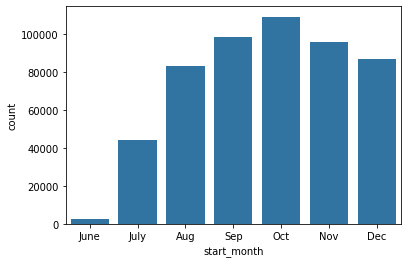

In [61]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_month', color=base_color)

The month of October saw the maximum number of rides.

Convert start_day to a categorical dtype

In [62]:
df['start_day']

0         6
1         6
2         6
3         6
4         6
         ..
519695    2
519696    2
519697    2
519698    2
519699    2
Name: start_day, Length: 519700, dtype: int64

In [65]:
df['start_day'].value_counts()

1    87865
2    87752
3    85243
0    81410
4    81165
5    50874
6    45391
Name: start_day, dtype: int64

In [67]:
day_dict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['start_day'] = df['start_day'].apply(lambda x: day_dict[x])

In [69]:
day_type = pd.api.types.CategoricalDtype(ordered=True, categories=['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
df['start_day'] = df['start_day'].astype(day_type)

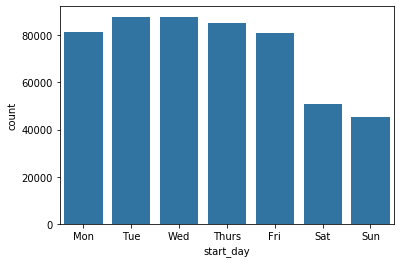

In [70]:
sb.countplot(data=df, x='start_day', color=base_color);

Seems like Tuesday and Wednesday were the most preferred days for bike rides.

Convert start_hour to categorical dtype

In [71]:
df['start_hour']

0         16
1         15
2         22
3         17
4         14
          ..
519695    10
519696     9
519697     9
519698     9
519699     9
Name: start_hour, Length: 519700, dtype: int64

In [72]:
df['start_hour'].value_counts()

17    60111
8     57227
18    46088
9     45457
16    41339
15    28448
12    27448
13    27374
7     26800
19    26598
10    25217
14    24900
11    24303
20    16642
21    11993
6      8895
22     7967
23     4867
0      2606
5      2145
1      1377
2       860
4       640
3       398
Name: start_hour, dtype: int64

In [74]:
hours = [i for i in range(0, 24)]

In [76]:
hour = pd.api.types.CategoricalDtype(ordered=True, categories=hours)
df['start_hour'] = df['start_hour'].astype(hour)

In [90]:
df['start_hour'].dtype

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23],
                 ordered=True)

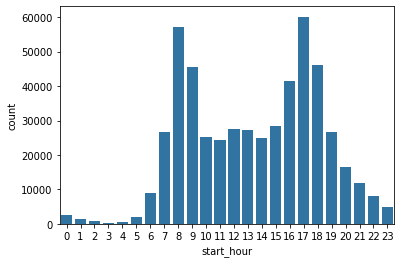

In [77]:
sb.countplot(data=df, x='start_hour', color=base_color)

8 and 18 seem to be the most common hours. Looks like most users use our services to commute to their offices

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> duration_sec is unimodally distributed and a bit right-skewed. We had to employ log transformation for duration_sec as the data had a very large range of values. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Weekdays seemed to be more popular than weekends for the rides. As start_month, start_day, and start_hour were ordinal variables, we converted them categorical dtype. age has a few  outliers due to which its distribution is right-skewed.

## Bivariate Exploration

### duration_sec vs user_type

Let's see duration_sec against user_type. For numeric vs categorical variable, violin plot seems to be approporiate.

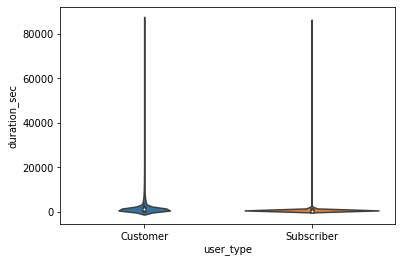

In [78]:
sb.violinplot(data=df, y='duration_sec', x='user_type')

As duration_sec was highly skewed, we get an unclear plot. Let's apply log transformation

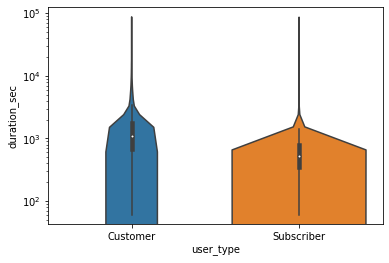

In [83]:
sb.violinplot(data=df, x='user_type', y='duration_sec')
plt.yscale('log');

To avoid the distrbution, let's try boxplots

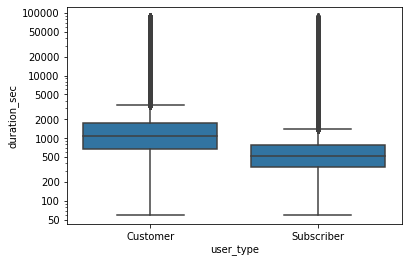

In [103]:
sb.boxplot(data=df, x='user_type', y='duration_sec', color=base_color)
plt.yscale('log')
y_ticks=[50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.yticks(y_ticks, y_ticks);

Customers, in general, took longer trips in comparison to subscribers, as evident from their medians

### duration_sec vs member_gender

Now, let us look at how gender(categorical) relates to duration_sec(numeric). Let's try a box plot

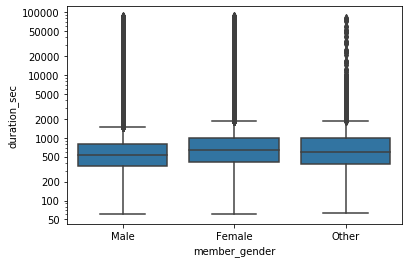

In [104]:
sb.boxplot(data=df, x='member_gender', y='duration_sec', color=base_color)
plt.yscale('log')
y_ticks = [50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.yticks(y_ticks, y_ticks);

Seems like females in general took longer rides than males and other genders.

Let's see how an adapted bar chart looks

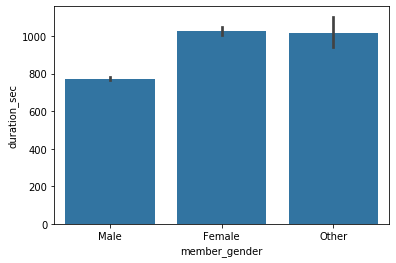

In [105]:
sb.barplot(data=df, x='member_gender', y='duration_sec', color=base_color)

### duration_sec vs approx_age

For numeric variables, a scatterplot seems appropriate

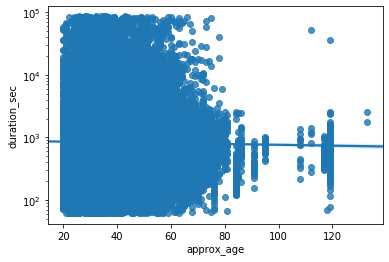

In [107]:
sb.regplot(data=df, x='approx_age', y='duration_sec')
plt.yscale('log');

There seems to be a slight decrease in the trip duration with age. But, as there are a large number of points, the trend looks unclear. Let's try a lineplot instead

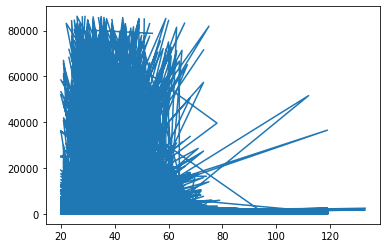

In [109]:
plt.errorbar(data=df, x='approx_age', y='duration_sec');

We'll first have to make the x variable ordered and use cut() to draw a meaningful plot

In [111]:
bin_edges=np.arange(df['approx_age'].min(), df['approx_age'].max() + 10, 10)
bin_centres = bin_edges[:-1] + 5
age_groups = pd.cut(df['approx_age'], bin_edges, include_lowest=True)
age_groups

0           (30.0, 40.0]
1           (50.0, 60.0]
2                    NaN
3                    NaN
4         (19.999, 30.0]
               ...      
519695    (19.999, 30.0]
519696      (40.0, 50.0]
519697      (30.0, 40.0]
519698      (30.0, 40.0]
519699      (30.0, 40.0]
Name: approx_age, Length: 519700, dtype: category
Categories (12, interval[float64]): [(19.999, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] ... (100.0, 110.0] < (110.0, 120.0] < (120.0, 130.0] < (130.0, 140.0]]

In [118]:
bin_edges

array([ 20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120.,
       130., 140.])

In [119]:
bin_centres

array([ 25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105., 115., 125.,
       135.])

In [113]:
mean_durations = df['duration_sec'].groupby(age_groups).mean()

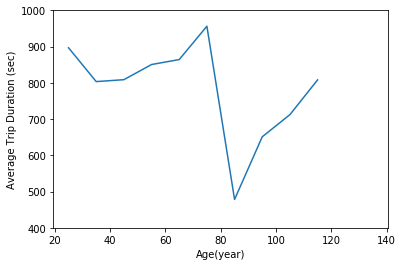

In [117]:
plt.errorbar(x=bin_centres, y=mean_durations);
plt.ylim(400, 1000)
plt.xlabel('Age(year)')
plt.ylabel('Average Trip Duration (sec)');

Trip duration doesn't follow a uniform trend. Surprisingly, highest average durations are observed for age groups 70-80 years. There is no uniform trend observed. Hence, we'll not explore this relationship further

### duration_sec vs start_month

start_month is an ordinal categorical variable whereas duration_sec is a quantitative variable. Let's try using faceting.

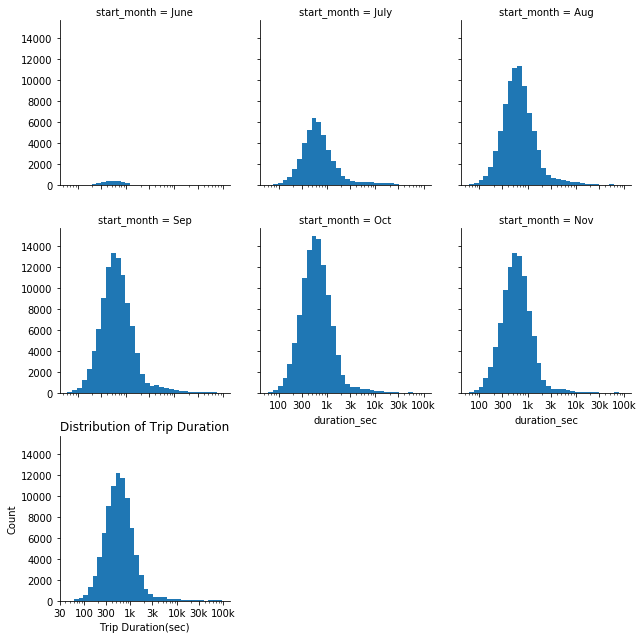

In [124]:
g = sb.FacetGrid(data=df, col='start_month', col_wrap=3)
bins = 10**(np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+0.1, 0.1))
g.map(plt.hist, 'duration_sec', bins=bins)
plt.xscale('log')
x_ticks=[30, 100, 300, 1000, 3000, 10000, 30000, 100000]
tick_labels = ['30', '100', '300', '1k', '3k', '10k', '30k', '100k']
plt.xticks(x_ticks, tick_labels)
plt.xlabel('Trip Duration(sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration');

Let's try box plots

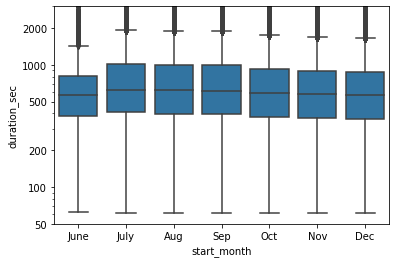

In [132]:
sb.boxplot(data=df, x='start_month', y='duration_sec', color=base_color)
plt.yscale('log')
plt.ylim(50, 3000)
y_ticks=[50, 100, 200, 500, 1000, 2000]
plt.yticks(y_ticks, y_ticks);

Looks like June had the shortest trips whereas July, August and September had the longest ones.

We'll adopt similar approaches for duration_sec vs start_day/start_hour

### duration_sec vs start_day

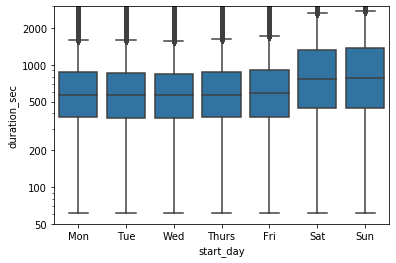

In [137]:
sb.boxplot(data=df, x='start_day', y='duration_sec', color=base_color)
plt.yscale('log')
plt.ylim(50, 3000)
y_ticks=[50, 100, 200, 500, 1000, 2000]
plt.yticks(y_ticks, y_ticks);

Saturday and Sunday had the longest trips while rest of the days had shorter but almost equal trips

### duration_sec vs start_hour

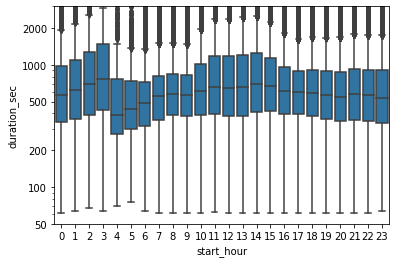

In [142]:
sb.boxplot(data=df, x='start_hour', y='duration_sec', color=base_color)
plt.yscale('log')
plt.ylim(50, 3000)
y_ticks=[50, 100, 200, 500, 1000, 2000]
plt.yticks(y_ticks, y_ticks);

Longest trips started between midnight and 3 AM

Now, we'll try and see how the age of users fares against our selected categorical variables

### approx_age vs user_type

Let's try a violin plot

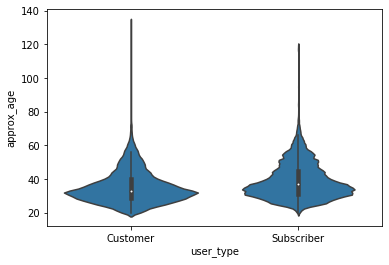

In [145]:
sb.violinplot(data=df, x='user_type', y='approx_age', color=base_color)

We note that the subscribers are in genral older than customers

### approx_age vs member_gender

For a quantitative vs categorical data type, let's use a box plot

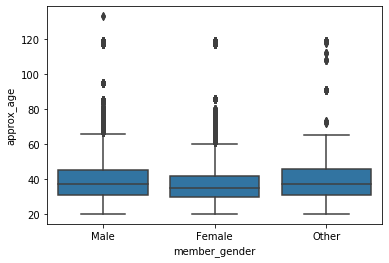

In [144]:
sb.boxplot(data=df, x='member_gender', y='approx_age', color=base_color)

We observe that female users are in general younger than the other genders

### approx_age vs start_month

approx_age is a quantitative variable whereas start_month is categorical(ordinal). Hence, a violin plot should suffice

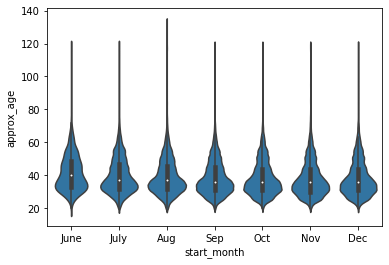

In [146]:
sb.violinplot(data=df, x='start_month', y='approx_age', color=base_color);

For clearer observation, let's try a boxplot

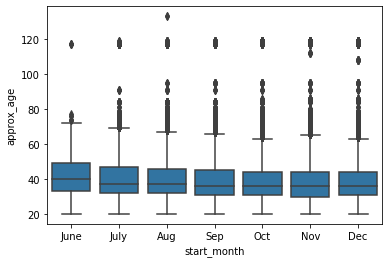

In [147]:
sb.boxplot(data=df, x='start_month', y='approx_age', color=base_color);

It seems that older users prefer hotter months than the colder ones

### approx_age vs start_day

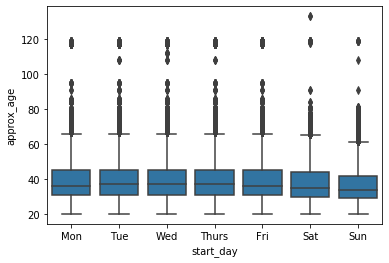

In [148]:
sb.boxplot(data=df, y='approx_age', x='start_day', color=base_color);

Younger users in general prefer to ride on weekends

### approx_age vs start_hour

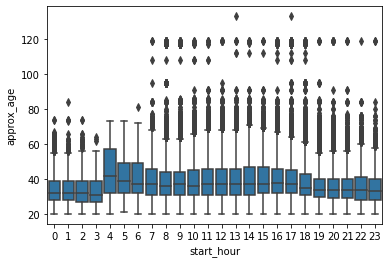

In [149]:
sb.boxplot(data=df, x='start_hour', y='approx_age', color=base_color);

Interestingly, younger users take rides during midnight-3AM. Older users prefer 4 AM the most

### user_type vs member_gender

As both are categorical variables, we'll try to plot a clustered bar chart

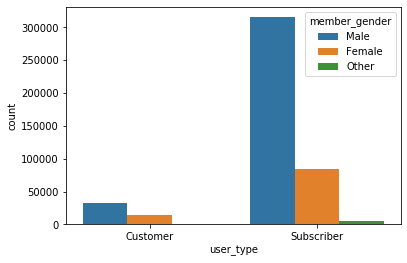

In [150]:
sb.countplot(data=df, x='user_type', hue='member_gender')

Both customers and subscribers are predominantly males

### user_type vs start_month

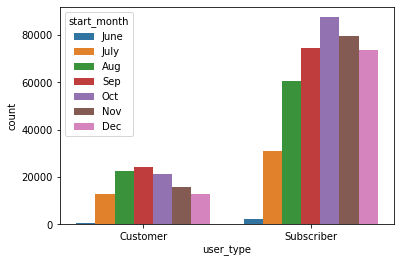

In [151]:
sb.countplot(data=df, x='user_type', hue='start_month')

Customers prefer September most whereas subscribers prefer October. Both ride least in June

### user_type vs start_day

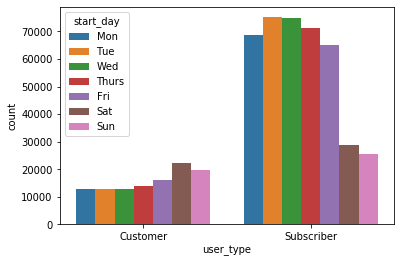

In [152]:
sb.countplot(data=df, x='user_type', hue='start_day')

Interestingly, customers prefer to ride more on weekends, whereas subscribers prefer to ride more during weekdays

user_type vs start_hour

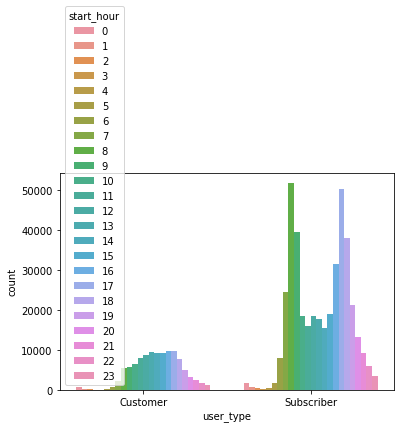

In [153]:
sb.countplot(data=df, x='user_type', hue='start_hour')

Subscribers prefer early morning rides whereas customers prefer evening rides more

### member_gender vs start_month

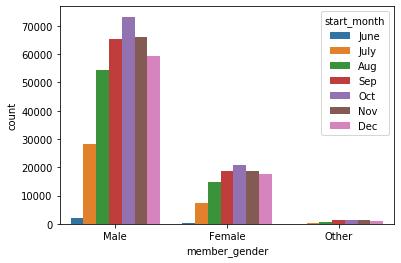

In [154]:
sb.countplot(data=df, x='member_gender', hue='start_month')

October is the most preferred month across genders

### member_gender vs start_day

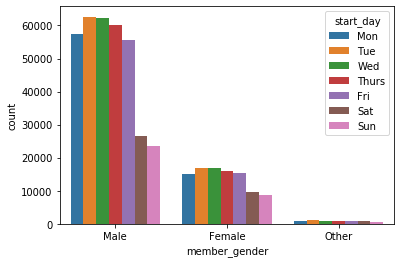

In [155]:
sb.countplot(data=df, x='member_gender', hue='start_day')

Tuesday, Wednesday and Thursday are the most preferred across genders. Weekends least preferred

### member_gender vs start_hour

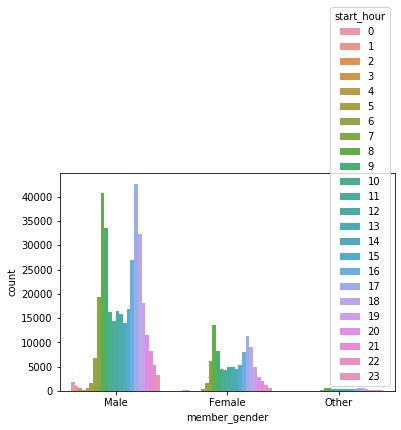

In [156]:
sb.countplot(data=df, x='member_gender', hue='start_hour')

Early morning and evening rides are most preferred across genders

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * Customers, in general, took longer trips in comparison to subscribers
* Females in general took longer rides than males and other genders.
* Highest average durations are observed for age groups 20-30 years and surprisingly, 70-80 years
* June had the shortest trips whereas July, August and September had the longest ones.
* Saturday and Sunday had the longest trips while rest of the days had shorter but almost equal trips
* Longest trips started between midnight and 3 AM


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * subscribers are in general older than customers
* female users are in general younger than the other genders
* older users prefer hotter months than the colder ones
* Younger users in general prefer to ride on weekends
* Interestingly, younger users take rides during midnight-3AM. Older users prefer 4 AM the most
* Customers prefer September most whereas subscribers prefer October. Both ride least in June
* Interestingly, customers prefer to ride more on weekends, whereas subscribers prefer to ride more during weekdays
* Subscribers prefer early morning rides whereas customers prefer evening rides more

## Multivariate Exploration

### duration_sec vs user_type and member_gender

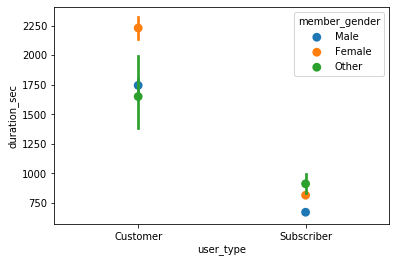

In [179]:
sb.pointplot(data=df, x='user_type', y='duration_sec', hue='member_gender', linestyles='' )

We observe that customers in general make longer trips than subscribers. However, for customers, females make the longest trips whereas for subscribers, members of the other genders do so. Male subscribers take the shortest trips.

### duration_sec vs user_type and start_month

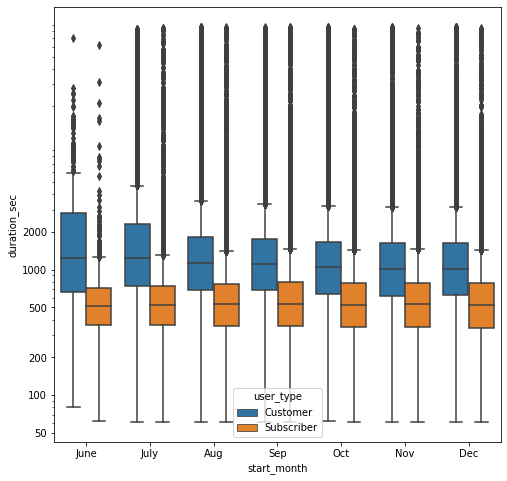

In [168]:
plt.figure(figsize=(8, 8))
sb.boxplot(data=df, x='start_month', y='duration_sec', hue='user_type')
plt.yscale('log')
y_ticks=[50, 100, 200, 500, 1000, 2000]
plt.yticks(y_ticks, y_ticks);

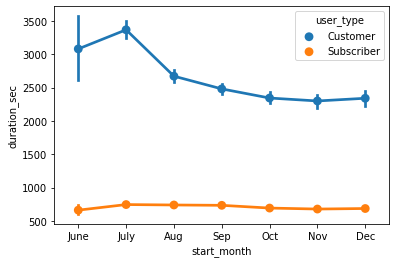

In [172]:
sb.pointplot(data=df, x='start_month', y='duration_sec', hue='user_type')

For customers, trip durations are highest in July and decline therafter, shortest trips being in December. For subscribers, longest trips are also in july and decline slightly after it. Shortest trips are during June.

### duration_sec vs user_type and start_day

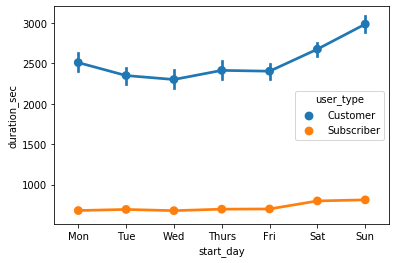

In [173]:
sb.pointplot(data=df, x='start_day', y='duration_sec', hue='user_type')

Both customers and subscribers took longer trips on weekends

### duration_sec vs user_type and start_hour

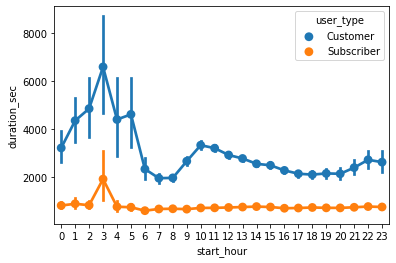

In [174]:
sb.pointplot(data=df, x='start_hour', y='duration_sec', hue='user_type' )

Longest trips start at 3 AM for both customers and subscribers. For customers, the shortest trips start at 7 or 8 AM, whereas for subscribers they start at 6 AM in general

### duration_sec vs member_gender and start_month

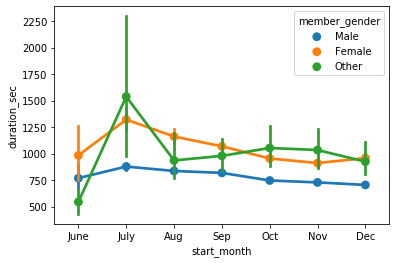

In [180]:
sb.pointplot(data=df, x='start_month', y='duration_sec', hue='member_gender' );

Longest trips occur during July for all genders. For females and males, there is an almost linear decrease in trip durations after July. Shortest trips for males and females are in December. For other genders, the shortest trips occurred in June. 

### duration_sec vs member_gender and start_day

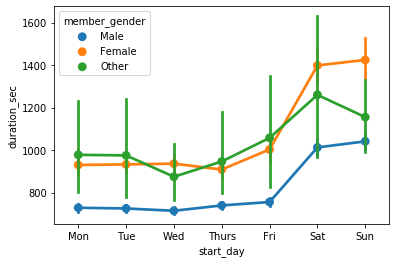

In [181]:
sb.pointplot(data=df, x='start_day', y='duration_sec', hue='member_gender' );

Members of all genders took their longest trips during weekends

### durations_sec vs member_gender and start_hour

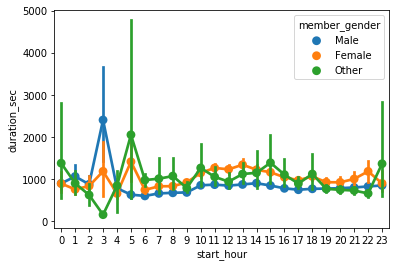

In [185]:
sb.pointplot(data=df, x='start_hour', y='duration_sec', hue='member_gender' );

Males make the longest trips when they start at 3 AM, females and others when they start at 5AM. Shortest trips for males are from 5-9 AM, for females from 4 AM, and for others from 3AM

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> * We observe that customers in general make longer trips than subscribers.
* For customers, trip durations are highest in July and decline therafter, shortest trips being in December. For subscribers, longest trips are also in july and decline slightly after it. Shortest trips are during June.
* Both customers and subscribers took longer trips on weekends
* Longest trips start at 3 AM for both customers and subscribers. For customers, the shortest trips start at 7 or 8 AM, whereas for subscribers they start at 6 AM in general
* Longest trips occur during July for all genders. For females and males, there is an almost linear decrease in trip durations after July. Shortest trips for males and females are in December. For other genders, the shortest trips occurred in June.
* Members of all genders took the their longest trips during weekends
* Males make the longest trips when they start at 3 AM, females and others when they start at 5AM. Shortest trips for males are from 5-9 AM, for females from 4 AM, and for others from 3AM



### Were there any interesting or surprising interactions between features?

>   For customers, females make the longest trips whereas for subscribers, members of the other genders do so. Male subscribers take the shortest trips.
